In [1]:
# import all necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import json
import math

In [2]:
# import dataset
dfCharging = pd.read_csv("data/charging_sessions.csv")

# ----------data preparation routine----------
dfCharging = dfCharging.drop('Unnamed: 0', axis=1)


# remove duplicate rows
dfCharging = dfCharging.drop_duplicates()


# Convert to datetime
dfCharging['connectionTime'] = pd.to_datetime(dfCharging['connectionTime'], utc)
dfCharging['disconnectTime'] = pd.to_datetime(dfCharging['disconnectTime'])
dfCharging['doneChargingTime'] = pd.to_datetime(dfCharging['doneChargingTime'])

In [3]:
def createConnectionTimeLastHour(row):
    
    return row.replace(second=0, minute=0)+pd.DateOffset(hours=1)
    

dfCharging['connectionTimeLastHour'] = dfCharging['connectionTime'].apply(createConnectionTimeLastHour)


In [4]:
dfCharging['connectionHour'] = (dfCharging['connectionTime']+pd.DateOffset(hours=1)).dt.hour
dfCharging['disconnectHour'] = (dfCharging['disconnectTime']+pd.DateOffset(hours=1)).dt.hour


In [5]:
def userInputStringToDictionary(entry):
    
    s = entry.replace("\'", "\"").replace("True", "1").replace("False","0")
    return json.loads(s)[0]

#Transform 'userInputs' into dictionary type
dfCharging['userInputs'] = dfCharging[~dfCharging['userInputs'].isna()]['userInputs'].apply(userInputStringToDictionary)

def returnKwhRequested(entry):
    
    return entry['kWhRequested']

#Create Column for some 'userInput' (dictionary) values
dfCharging['kWhRequested'] = dfCharging[~dfCharging['userInputs'].isna()]['userInputs'].apply(returnKwhRequested)

In [6]:
dfCharging[dfCharging['userInputs'].isnull()]

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs,connectionTimeLastHour,connectionHour,disconnectHour,kWhRequested
11,5e23b149f9af8b5fe4b973da,2020-01-02 15:04:38+00:00,2020-01-02 23:33:26+00:00,2020-01-02 22:48:48+00:00,0.812,1_1_194_818_2020-01-02 15:04:37.511153,1,AG-1F14,1-1-194-818,America/Los_Angeles,NaN,NaN,2020-01-02 16:00:00+00:00,16,0,NaN
41,5e23b149f9af8b5fe4b973f8,2020-01-02 17:21:05+00:00,2020-01-02 20:10:40+00:00,2020-01-02 19:59:39+00:00,0.852,1_1_191_782_2020-01-02 17:21:04.799964,1,AG-4F50,1-1-191-782,America/Los_Angeles,NaN,NaN,2020-01-02 18:00:00+00:00,18,21,NaN
180,5e2a48e8f9af8b75aed8e941,2020-01-07 14:31:09+00:00,2020-01-08 00:46:30+00:00,2020-01-07 15:07:06+00:00,0.847,1_1_179_800_2020-01-07 14:31:09.167002,1,AG-3F32,1-1-179-800,America/Los_Angeles,NaN,NaN,2020-01-07 15:00:00+00:00,15,1,NaN
193,5e2a48e8f9af8b75aed8e94e,2020-01-07 15:00:25+00:00,2020-01-07 23:30:37+00:00,2020-01-07 22:54:11+00:00,0.735,1_1_179_779_2020-01-07 15:00:25.479475,1,AG-3F17,1-1-179-779,America/Los_Angeles,NaN,NaN,2020-01-07 16:00:00+00:00,16,0,NaN
265,5e2b9a62f9af8b7d745b131d,2020-01-08 15:01:52+00:00,2020-01-08 19:01:39+00:00,2020-01-08 16:33:58+00:00,0.769,1_1_179_801_2020-01-08 15:01:51.810453,1,AG-3F21,1-1-179-801,America/Los_Angeles,NaN,NaN,2020-01-08 16:00:00+00:00,16,20,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64831,5d2a77bbf9af8b3b7a370327,2019-06-27 13:46:34+00:00,2019-06-27 17:16:52+00:00,2019-06-27 17:05:36+00:00,0.714,1_1_179_777_2019-06-27 13:46:51.123219,1,AG-3F28,1-1-179-777,America/Los_Angeles,NaN,NaN,2019-06-27 14:00:00+00:00,14,18,NaN
64873,5d2a77bbf9af8b3b7a370351,2019-06-27 21:20:33+00:00,2019-06-28 00:54:31+00:00,2019-06-27 23:00:09+00:00,0.902,1_1_178_828_2019-06-27 21:20:33.112168,1,AG-1F10,1-1-178-828,America/Los_Angeles,NaN,NaN,2019-06-27 22:00:00+00:00,22,1,NaN
64934,5d2bc939f9af8b3f5524419b,2019-06-28 14:24:10+00:00,2019-06-28 15:36:49+00:00,2019-06-28 15:34:52+00:00,0.747,1_1_191_793_2019-06-28 14:24:10.115685,1,AG-4F38,1-1-191-793,America/Los_Angeles,NaN,NaN,2019-06-28 15:00:00+00:00,15,16,NaN
64972,5d2fbdd3f9af8b4d0dd0d50e,2019-07-01 12:27:08+00:00,2019-07-01 23:13:44+00:00,2019-07-01 23:12:31+00:00,0.923,1_1_194_822_2019-07-01 12:27:07.584037,1,AG-1F12,1-1-194-822,America/Los_Angeles,NaN,NaN,2019-07-01 13:00:00+00:00,13,0,NaN


In [7]:
dfCharging.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65037 entries, 0 to 65036
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype              
---  ------                  --------------  -----              
 0   id                      65037 non-null  object             
 1   connectionTime          65037 non-null  datetime64[ns, UTC]
 2   disconnectTime          65037 non-null  datetime64[ns, UTC]
 3   doneChargingTime        60950 non-null  datetime64[ns, UTC]
 4   kWhDelivered            65037 non-null  float64            
 5   sessionID               65037 non-null  object             
 6   siteID                  65037 non-null  int64              
 7   spaceID                 65037 non-null  object             
 8   stationID               65037 non-null  object             
 9   timezone                65037 non-null  object             
 10  userID                  47822 non-null  float64            
 11  userInputs              47822 non-null  o

In [8]:
dfCharging['userInputs'].iloc[0]['kWhRequested']

25.0

In [9]:
a = []
b = []
for i in range(0,24):
    a.append(dfCharging[(dfCharging['siteID']==1) & (dfCharging['connectionHour']==i) & (dfCharging['kWhRequested'].notnull())]['kWhRequested'].sum())
    b.append(dfCharging[(dfCharging['siteID']==2) & (dfCharging['connectionHour']==i) & (dfCharging['kWhRequested'].notnull())]['kWhRequested'].sum())

In [10]:
import matplotlib.pyplot as plt

# Create a line plot
plt.figure(figsize=(10, 6))
#plt.plot(dfPlotKPI1['hours'], dfPlotKPI1['avg_sum_kWhRequested1'], label='avg_sum_kWhRequested1', marker='o')
#plt.plot(dfPlotKPI1['hours'], dfPlotKPI1['avg_sum_kWhRequested2'], label='avg_sum_kWhRequested2', marker='o')
plt.plot(dfPlotKPI1['hours'], a, label='sum kWh', marker='o')
plt.plot(dfPlotKPI1['hours'], b, label='sum kWh', marker='o')

# Add labels and title
plt.xlabel('Column1')
plt.ylabel('Values')
plt.title('Line Plot with Columns 2 and 3')
plt.legend()

# Show the plot
plt.show()

NameError: name 'dfPlotKPI1' is not defined

<Figure size 1000x600 with 0 Axes>

In [42]:
dfCharging['userInputs'].iloc[0]

{'WhPerMile': 250,
 'kWhRequested': 25.0,
 'milesRequested': 100,
 'minutesAvailable': 463,
 'modifiedAt': 'Thu, 02 Jan 2020 13:09:39 GMT',
 'paymentRequired': 1,
 'requestedDeparture': 'Thu, 02 Jan 2020 20:51:54 GMT',
 'userID': 194}

In [12]:
print(dfCharging['connectionTime'].min())
print(dfCharging['connectionTime'].max())

2018-04-25 11:08:04+00:00
2021-09-14 05:43:39+00:00


In [13]:
print(dfCharging['disconnectTime'].min())
print(dfCharging['disconnectTime'].max())

2018-04-25 13:20:10+00:00
2021-09-14 14:46:28+00:00


In [14]:
startTimestamp = min(dfCharging['connectionTime'].min(),dfCharging['disconnectTime'].min()).replace(microsecond=0, second=0, minute=0)
print(startTimestamp)

2018-04-25 11:00:00+00:00


In [15]:
endTimestamp = max(dfCharging['connectionTime'].max(),dfCharging['disconnectTime'].max()).replace(microsecond=0, second=0, minute=0) + pd.DateOffset(hours=1)
print(endTimestamp)

2021-09-14 15:00:00+00:00


### 1. KPI absolute utilization

In [39]:
dfCharging[dfCharging['kWhRequested'].notnull()]

,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs,connectionTimeLastHour,connectionHour,disconnectHour,kWhRequested
0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"{'WhPerMile': 250, 'kWhRequested': 25.0, 'mile...",2020-01-02 14:00:00+00:00,14,20,25.00
1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"{'WhPerMile': 280, 'kWhRequested': 70.0, 'mile...",2020-01-02 14:00:00+00:00,14,23,70.00
2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"{'WhPerMile': 400, 'kWhRequested': 8.0, 'miles...",2020-01-02 14:00:00+00:00,14,1,8.00
3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"{'WhPerMile': 400, 'kWhRequested': 8.0, 'miles...",2020-01-02 14:00:00+00:00,14,17,8.00
4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"{'WhPerMile': 400, 'kWhRequested': 16.0, 'mile...",2020-01-02 15:00:00+00:00,15,23,16.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65032,5d2fbdd3f9af8b4d0dd0d54a,2019-07-01 21:49:12+00:00,2019-07-02 01:37:18+00:00,2019-07-01 23:14:33+00:00,8.399,1_1_179_798_2019-07-01 21:49:11.873404,1,AG-3F18,1-1-179-798,America/Los_Angeles,1346.0,"{'WhPerMile': 400, 'kWhRequested': 32.0, 'mile...",2019-07-01 22:00:00+00:00,22,2,32.00
65033,5d2fbdd3f9af8b4d0dd0d54b,2019-07-01 21:58:45+00:00,2019-07-02 00:39:48+00:00,2019-07-02 00:40:21+00:00,16.864,1_1_179_794_2019-07-01 21:58:44.571011,1,AG-3F20,1-1-179-794,America/Los_Angeles,364.0,"{'WhPerMile': 400, 'kWhRequested': 40.0, 'mile...",2019-07-01 22:00:00+00:00,22,1,40.00
65034,5d2fbdd3f9af8b4d0dd0d54c,2019-07-01 22:02:21+00:00,2019-07-02 00:58:50+00:00,2019-07-02 00:59:23+00:00,18.335,1_1_191_807_2019-07-01 22:02:20.810735,1,AG-4F47,1-1-191-807,America/Los_Angeles,2050.0,"{'WhPerMile': 333, 'kWhRequested': 29.97, 'mil...",2019-07-01 23:00:00+00:00,23,1,29.97
65035,5d2fbdd3f9af8b4d0dd0d54d,2019-07-01 22:23:44+00:00,2019-07-02 02:03:36+00:00,2019-07-02 02:04:06+00:00,22.815,1_1_179_781_2019-07-01 22:23:32.496137,1,AG-3F31,1-1-179-781,America/Los_Angeles,1626.0,"{'WhPerMile': 200, 'kWhRequested': 34.0, 'mile...",2019-07-01 23:00:00+00:00,23,3,34.00


In [49]:
df.describe()

,absUtilization1,absUtilization2,avg_kWhRequested1,avg_kWhRequested2
count,29717.000000,29717.000000,7969.000000,7714.000000
mean,7.767641,5.985530,25.390371,24.602029
std,15.109136,9.679512,14.466691,19.976850
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,15.666667,12.000000
50%,1.000000,2.000000,22.442059,19.436750
75%,6.000000,7.000000,31.410000,30.000000
max,52.000000,50.000000,180.000000,215.320000


In [47]:
df = pd.DataFrame({'hours': pd.date_range(startTimestamp, endTimestamp, freq='1H')})

# Create new columns
df['absUtilization1'] = 0
df['absUtilization2'] = 0
df['avg_kWhRequested1'] = 0
df['avg_kWhRequested2'] = 0


In [41]:
dfCharging[(dfCharging['kWhRequested'].notnull()) & (dfCharging['siteID'] == 1) & (dfCharging['connectionTimeLastHour'] == df.iloc[0]['hours'])]['kWhRequested'].mean()
    

nan

In [43]:
df.iloc[0]['hours']

Timestamp('2018-04-25 11:00:00+0000', tz='UTC')

In [48]:
# Loop through DataFrame rows using iterrows
for index, row in df.iterrows():
    
    if index%5000==0:
        print(index)
    df.at[index, 'absUtilization1'] = dfCharging[(dfCharging['siteID'] == 1) & 
                                                 (dfCharging['connectionTime'] <= row['hours']) & 
                                                 (dfCharging['disconnectTime'] >= row['hours'])].shape[0]
    df.at[index, 'absUtilization2'] = dfCharging[(dfCharging['siteID'] == 2) & 
                                                 (dfCharging['connectionTime'] <= row['hours']) & 
                                                 (dfCharging['disconnectTime'] >= row['hours'])].shape[0]
    #df.at[index, 'registeredUsers1'] = dfCharging[(dfCharging['userInputs'].notnull()) &
    #                                              (dfCharging['siteID'] == 1) &
    #                                             (dfCharging['connectionTime'] <= row['hours']) & 
    #                                             (dfCharging['disconnectTime'] >= row['hours'])].shape[0]
    #df.at[index, 'registeredUsers2'] = dfCharging[(dfCharging['userInputs'].notnull()) &
    #                                              (dfCharging['siteID'] == 2) &
    #                                             (dfCharging['connectionTime'] <= row['hours']) & 
    #                                             (dfCharging['disconnectTime'] >= row['hours'])].shape[0]
    df.at[index, 'avg_kWhRequested1'] = dfCharging[(dfCharging['kWhRequested'].notnull()) &
                                                  (dfCharging['siteID'] == 1) &
                                                 (dfCharging['connectionTimeLastHour'] == row['hours'])]['kWhRequested'].mean()
    df.at[index, 'avg_kWhRequested2'] = dfCharging[(dfCharging['kWhRequested'].notnull()) &
                                                  (dfCharging['siteID'] == 2) &
                                                 (dfCharging['connectionTimeLastHour'] == row['hours'])]['kWhRequested'].mean()
    #df.at[index, 'sum_kWhRequested1'] = dfCharging[(dfCharging['kWhRequested'].notnull()) &
    #                                              (dfCharging['siteID'] == 1) &
    #                                             (dfCharging['connectionTimeLastHour'] == row['hours'])]['kWhRequested'].sum()
    #df.at[index, 'sum_kWhRequested2'] = dfCharging[(dfCharging['kWhRequested'].notnull()) &
    #                                              (dfCharging['siteID'] == 2) &
    #                                             (dfCharging['connectionTimeLastHour'] == row['hours'])]['kWhRequested'].sum()


0
5000
10000
15000
20000
25000


In [18]:
df[df['avg_kWhRequested1'].notnull() | df['avg_kWhRequested2'].notnull()]

,hours,absUtilization1,absUtilization2,registeredUsers1,registeredUsers2,avg_kWhRequested1,avg_kWhRequested2,sum_kWhRequested1,sum_kWhRequested2
125,2018-04-30 16:00:00+00:00,0,20,0,1,NaN,59.50,0.000,59.5
292,2018-05-07 15:00:00+00:00,0,11,0,1,NaN,8.00,0.000,8.0
389,2018-05-11 16:00:00+00:00,0,23,0,1,NaN,17.50,0.000,17.5
459,2018-05-14 14:00:00+00:00,0,6,0,1,NaN,8.00,0.000,8.0
470,2018-05-15 01:00:00+00:00,0,19,0,1,NaN,5.00,0.000,5.0
...,...,...,...,...,...,...,...,...,...
29699,2021-09-13 22:00:00+00:00,29,13,27,13,75.051,20.05,75.051,40.1
29700,2021-09-13 23:00:00+00:00,22,13,22,13,NaN,30.00,0.000,30.0
29701,2021-09-14 00:00:00+00:00,13,11,13,11,NaN,5.80,0.000,5.8
29703,2021-09-14 02:00:00+00:00,2,2,2,2,15.500,28.60,15.500,28.6


In [19]:
dfCopy = df.copy()

In [20]:
df 

,hours,absUtilization1,absUtilization2,registeredUsers1,registeredUsers2,avg_kWhRequested1,avg_kWhRequested2,sum_kWhRequested1,sum_kWhRequested2
0,2018-04-25 11:00:00+00:00,0,0,0,0,NaN,NaN,0.0,0.0
1,2018-04-25 12:00:00+00:00,0,1,0,0,NaN,NaN,0.0,0.0
2,2018-04-25 13:00:00+00:00,0,1,0,0,NaN,NaN,0.0,0.0
3,2018-04-25 14:00:00+00:00,0,2,0,0,NaN,NaN,0.0,0.0
4,2018-04-25 15:00:00+00:00,0,7,0,0,NaN,NaN,0.0,0.0
...,...,...,...,...,...,...,...,...,...
29712,2021-09-14 11:00:00+00:00,1,0,1,0,NaN,NaN,0.0,0.0
29713,2021-09-14 12:00:00+00:00,1,0,1,0,NaN,NaN,0.0,0.0
29714,2021-09-14 13:00:00+00:00,1,0,1,0,NaN,NaN,0.0,0.0
29715,2021-09-14 14:00:00+00:00,1,0,1,0,NaN,NaN,0.0,0.0


In [21]:
df.loc[df['avg_kWhRequested1'].isnull(),'avg_kWhRequested1'] = 0
df.loc[df['avg_kWhRequested2'].isnull(),'avg_kWhRequested2'] = 0


In [22]:
dfPlotKPI1 = pd.DataFrame({'hours': range(24)})
dfPlotKPI1['avgUtilization1'] = 0
dfPlotKPI1['avgUtilization2'] = 0
dfPlotKPI1['newStartedSessions'] = 0
dfPlotKPI1['endedSessions'] = 0
dfPlotKPI1['avgNrRegisteredUsers1'] = 0
dfPlotKPI1['avgNrRegisteredUsers2'] = 0
dfPlotKPI1['avg_sum_kWhRequested1'] = 0
dfPlotKPI1['avg_sum_kWhRequested2'] = 0

In [23]:
for index, row in dfPlotKPI1.iterrows():
    
    dfPlotKPI1.at[index,'avgUtilization1'] = df[df['hours'].dt.hour == row['hours']]['absUtilization1'].mean()
    dfPlotKPI1.at[index,'avgUtilization2'] = df[df['hours'].dt.hour == row['hours']]['absUtilization2'].mean()
    dfPlotKPI1.at[index,'newStartedSessions'] = dfCharging[dfCharging['connectionHour'] == row['hours']].shape[0]
    dfPlotKPI1.at[index,'endedSessions'] = dfCharging[dfCharging['disconnectHour'] == row['hours']].shape[0]
    dfPlotKPI1.at[index,'avgNrRegisteredUsers1'] = df[df['hours'].dt.hour == row['hours']]['registeredUsers1'].mean()
    dfPlotKPI1.at[index,'avgNrRegisteredUsers2'] = df[df['hours'].dt.hour == row['hours']]['registeredUsers2'].mean()
    #dfPlotKPI1.at[index,'avg_kWhRequestedPerUser1'] = df[(df['hours'].dt.hour == row['hours']) & (df['avg_kWhRequested1'].notnull())]['avg_kWhRequested1'].mean()
    #dfPlotKPI1.at[index,'avg_kWhRequestedPerUser2'] = df[(df['hours'].dt.hour == row['hours']) & (df['avg_kWhRequested2'].notnull())]['avg_kWhRequested2'].mean()
    #dfPlotKPI1.at[index,'avg_sum_kWhRequested1'] = df[(df['hours'].dt.hour == row['hours']) & (df['sum_kWhRequested1'] > 0)]['sum_kWhRequested1'].mean()
    #dfPlotKPI1.at[index,'avg_sum_kWhRequested2'] = df[(df['hours'].dt.hour == row['hours']) & (df['sum_kWhRequested2'] > 0)]['sum_kWhRequested2'].mean()
    dfPlotKPI1.at[index,'avg_kWhRequestedPerUser1'] = df[(df['hours'].dt.hour == row['hours'])]['avg_kWhRequested1'].mean()
    dfPlotKPI1.at[index,'avg_kWhRequestedPerUser2'] = df[(df['hours'].dt.hour == row['hours'])]['avg_kWhRequested2'].mean()
    dfPlotKPI1.at[index,'avg_sum_kWhRequested1'] = df[(df['hours'].dt.hour == row['hours'])]['sum_kWhRequested1'].mean()
    dfPlotKPI1.at[index,'avg_sum_kWhRequested2'] = df[(df['hours'].dt.hour == row['hours'])]['sum_kWhRequested2'].mean()
    

In [24]:
dfPlotKPI1

,hours,avgUtilization1,avgUtilization2,newStartedSessions,endedSessions,avgNrRegisteredUsers1,avgNrRegisteredUsers2,avg_sum_kWhRequested1,avg_sum_kWhRequested2,avg_kWhRequestedPerUser1,avg_kWhRequestedPerUser2
0,0,11.605008,10.905493,2563,9506,10.984653,6.540388,21.307952,11.124696,8.129198,8.661449
1,1,6.414378,7.987884,2062,12099,6.105008,4.783522,11.385735,11.598444,5.409958,8.852232
2,2,2.862682,5.647819,1814,9108,2.715670,3.170436,3.488045,15.611191,2.753643,11.126052
3,3,1.509693,4.171244,1394,4898,1.437803,2.126817,1.972795,12.842527,1.681080,9.616606
4,4,0.883683,3.247173,1048,2966,0.837641,1.554927,1.119265,10.554847,1.109673,8.598109
5,5,0.673667,2.661551,774,1759,0.634087,1.264136,1.467447,7.991223,1.333477,6.716508
6,6,0.550889,2.084814,444,1310,0.521002,0.951535,1.008070,3.488465,0.998781,3.359935
7,7,0.453150,1.820679,266,715,0.435380,0.792407,0.573409,3.066252,0.563716,2.959350
8,8,0.322294,1.735057,164,431,0.304523,0.725363,0.428611,1.030372,0.409023,1.022294
9,9,0.225363,1.689822,109,285,0.208401,0.692246,0.277859,1.237027,0.277859,1.176317


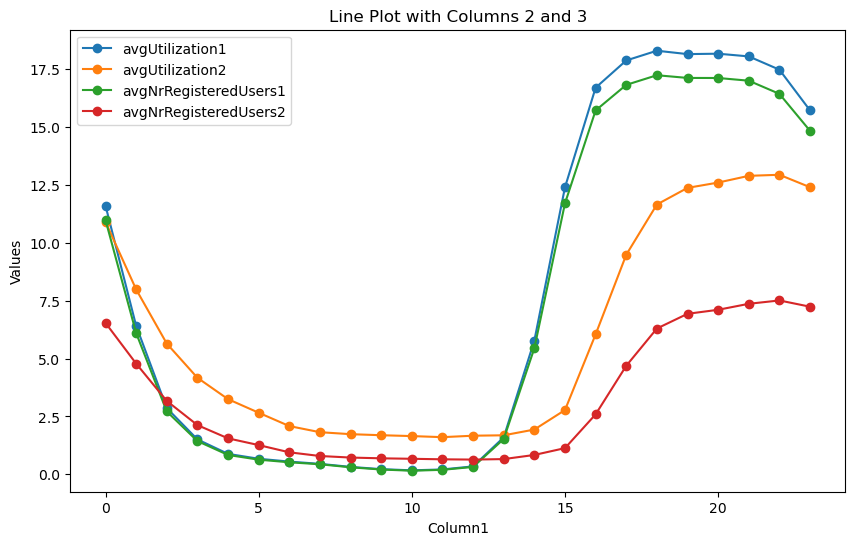

In [25]:
import matplotlib.pyplot as plt

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(dfPlotKPI1['hours'], dfPlotKPI1['avgUtilization1'], label='avgUtilization1', marker='o')
plt.plot(dfPlotKPI1['hours'], dfPlotKPI1['avgUtilization2'], label='avgUtilization2', marker='o')
plt.plot(dfPlotKPI1['hours'], dfPlotKPI1['avgNrRegisteredUsers1'], label='avgNrRegisteredUsers1', marker='o')
plt.plot(dfPlotKPI1['hours'], dfPlotKPI1['avgNrRegisteredUsers2'], label='avgNrRegisteredUsers2', marker='o')

# Add labels and title
plt.xlabel('Column1')
plt.ylabel('Values')
plt.title('Line Plot with Columns 2 and 3')
plt.legend()

# Show the plot
plt.show()

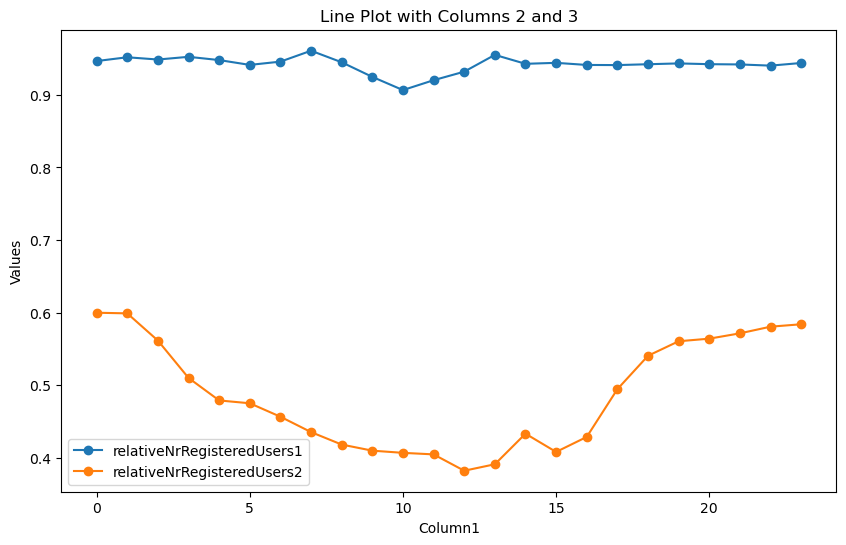

In [26]:
import matplotlib.pyplot as plt

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(dfPlotKPI1['hours'], dfPlotKPI1['avgNrRegisteredUsers1']/dfPlotKPI1['avgUtilization1'], label='relativeNrRegisteredUsers1', marker='o')
plt.plot(dfPlotKPI1['hours'], dfPlotKPI1['avgNrRegisteredUsers2']/dfPlotKPI1['avgUtilization2'], label='relativeNrRegisteredUsers2', marker='o')

# Add labels and title
plt.xlabel('Column1')
plt.ylabel('Values')
plt.title('Line Plot with Columns 2 and 3')
plt.legend()

# Show the plot
plt.show()

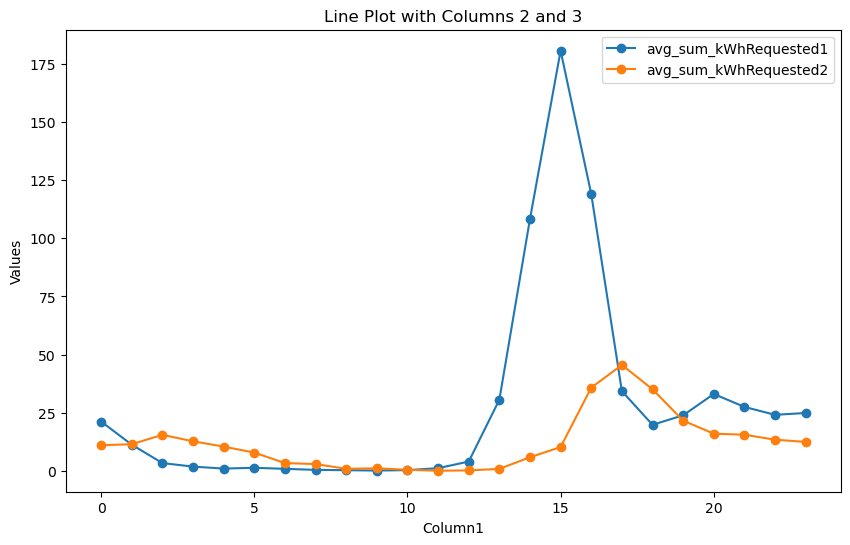

In [27]:
import matplotlib.pyplot as plt

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(dfPlotKPI1['hours'], dfPlotKPI1['avg_sum_kWhRequested1'], label='avg_sum_kWhRequested1', marker='o')
plt.plot(dfPlotKPI1['hours'], dfPlotKPI1['avg_sum_kWhRequested2'], label='avg_sum_kWhRequested2', marker='o')
#plt.plot(dfPlotKPI1['hours'], dfPlotKPI1['avg_kWhRequestedPerUser1'], label='avg_kWhRequestedPerUser1', marker='o')
#plt.plot(dfPlotKPI1['hours'], dfPlotKPI1['avg_kWhRequestedPerUser2'], label='avg_kWhRequestedPerUser2', marker='o')

# Add labels and title
plt.xlabel('Column1')
plt.ylabel('Values')
plt.title('Line Plot with Columns 2 and 3')
plt.legend()

# Show the plot
plt.show()

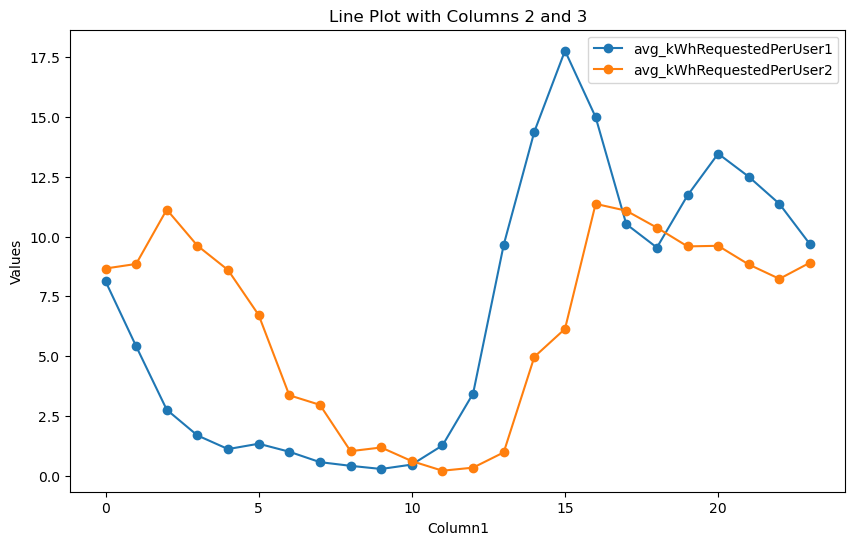

In [28]:
import matplotlib.pyplot as plt

# Create a line plot
plt.figure(figsize=(10, 6))
#plt.plot(dfPlotKPI1['hours'], dfPlotKPI1['avg_sum_kWhRequested1'], label='avg_sum_kWhRequested1', marker='o')
#plt.plot(dfPlotKPI1['hours'], dfPlotKPI1['avg_sum_kWhRequested2'], label='avg_sum_kWhRequested2', marker='o')
plt.plot(dfPlotKPI1['hours'], dfPlotKPI1['avg_kWhRequestedPerUser1'], label='avg_kWhRequestedPerUser1', marker='o')
plt.plot(dfPlotKPI1['hours'], dfPlotKPI1['avg_kWhRequestedPerUser2'], label='avg_kWhRequestedPerUser2', marker='o')

# Add labels and title
plt.xlabel('Column1')
plt.ylabel('Values')
plt.title('Line Plot with Columns 2 and 3')
plt.legend()

# Show the plot
plt.show()

In [29]:
df['avg_kWhRequested1'].describe()

count    29717.000000
mean         6.808758
std         13.514413
min          0.000000
25%          0.000000
50%          0.000000
75%         10.000000
max        180.000000
Name: avg_kWhRequested1, dtype: float64

In [30]:
df['avg_kWhRequested2'].describe()

count    29717.000000
mean         6.386245
std         14.829599
min          0.000000
25%          0.000000
50%          0.000000
75%          6.000000
max        215.320000
Name: avg_kWhRequested2, dtype: float64